In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

## Create test, train, and validation directory variables

In [2]:
train_dir=r'C:\Users\akash\Desktop\course\Deep Learning\Final_Assignment_Face Mask Dataset\Train'
validation_dir=r'C:\Users\akash\Desktop\course\Deep Learning\Final_Assignment_Face Mask Dataset\Validation'
test_dir=r'C:\Users\akash\Desktop\course\Deep Learning\Final_Assignment_Face Mask Dataset\Test'

## Create train and validation data generator with target size (128,128)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40, # it will rotate the image randomly through any angle between -40 to 40 degrees.
                                width_shift_range=0.2, # it will shift the image by any percent, from 0 to 20% randomly.
                                height_shift_range=0.2,  # All these are done to avoid overfitting.
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Train a CNN model

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [11]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [12]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=20,
                            validation_data=validation_generator,
                            validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 44s 438ms/step - loss: 0.4029 - acc: 0.8135 - val_loss: 0.2684 - val_acc: 0.9050
Epoch 2/20
100/100 [==============================] - 45s 449ms/step - loss: 0.2762 - acc: 0.8855 - val_loss: 0.2401 - val_acc: 0.9090
Epoch 3/20
100/100 [==============================] - 48s 480ms/step - loss: 0.2421 - acc: 0.8995 - val_loss: 0.2192 - val_acc: 0.9080
Epoch 4/20
100/100 [==============================] - 48s 482ms/step - loss: 0.2217 - acc: 0.9135 - val_loss: 0.1831 - val_acc: 0.9250
Epoch 5/20
100/100 [==============================] - 42s 423ms/step - loss: 0.2100 - acc: 0.9175 - val_loss: 0.1829 - val_acc: 0.9380
Epoch 6/20
100/100 [==============================] - 41s 407ms/step - loss: 0.1955 - acc: 0.9325 - val_loss: 0.1728 - val_acc: 0.9370
Epoch 7/20
100/100 [==============================] - 42s 415ms/step - loss: 0.1938 - acc: 0.9310 - val_loss: 0.15

In [13]:
model.save("facemask_augmentation.h5")

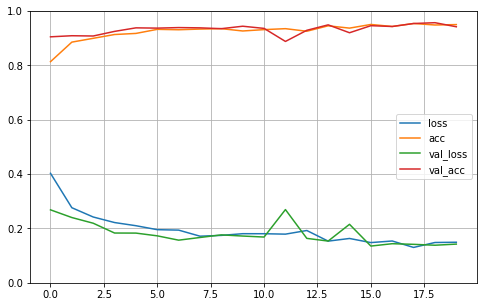

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
from tensorflow.keras import backend as k

k.clear_session()
del model

## Train a model with VGG19 model

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40, # it will rotate the image randomly through any angle between -40 to 40 degrees.
                                width_shift_range=0.2, # it will shift the image by any percent, from 0 to 20% randomly.
                                height_shift_range=0.2,  # All these are done to avoid overfitting.
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.applications import VGG19

conv_base=VGG19(weights="imagenet",
                include_top=False,
                input_shape=(128,128,3))

80142336/80134624 [==============================] - 86s 1us/step


In [19]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [20]:
from tensorflow.keras import models,layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [22]:
conv_base.trainable=False

In [23]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=["acc"])

## Use callbacks to save your model at every step

In [24]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Facemask_Project_Model-{epoch:02d}.h5")

In [25]:
history=model.fit(train_generator,
                steps_per_epoch=100,
                epochs=7,
                validation_data=validation_generator,
                validation_steps=50,
                callbacks=[checkpoint_cb])

Epoch 1/7
100/100 [==============================] - 229s 2s/step - loss: 0.4591 - acc: 0.8170 - val_loss: 0.3171 - val_acc: 0.9130
Epoch 2/7
100/100 [==============================] - 166s 2s/step - loss: 0.2618 - acc: 0.9230 - val_loss: 0.2197 - val_acc: 0.9310
Epoch 3/7
100/100 [==============================] - 172s 2s/step - loss: 0.1975 - acc: 0.9425 - val_loss: 0.1873 - val_acc: 0.9380
Epoch 4/7
100/100 [==============================] - 172s 2s/step - loss: 0.1906 - acc: 0.9315 - val_loss: 0.1631 - val_acc: 0.9450
Epoch 5/7
100/100 [==============================] - 177s 2s/step - loss: 0.1498 - acc: 0.9510 - val_loss: 0.1490 - val_acc: 0.9530
Epoch 6/7
100/100 [==============================] - 176s 2s/step - loss: 0.1567 - acc: 0.9440 - val_loss: 0.1444 - val_acc: 0.9490
Epoch 7/7
100/100 [==============================] - 175s 2s/step - loss: 0.1565 - acc: 0.9385 - val_loss: 0.1299 - val_acc: 0.9580


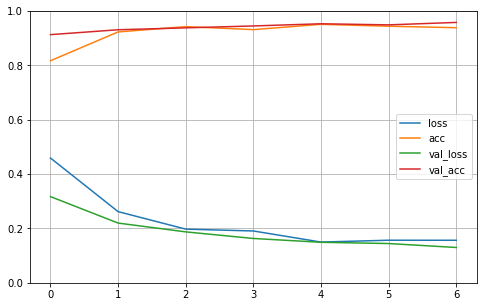

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary')

Found 992 images belonging to 2 classes.


In [28]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 46s 927ms/step - loss: 0.0657 - acc: 0.9778


[0.06567699462175369, 0.9778226017951965]